<a href="https://colab.research.google.com/github/abhijitguinkatwa/machine-learning-project/blob/main/Phishing_webpages_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Phishing is a type of semantic attack,4 often used to steal user sensitive information including login credentials and 
# credit card numbers.5-7 It occurs when an attacker, masquerading as a trusted entity, entice a victim into clicking on a link
#  or opening an attachment in an email or instant message through social messaging services such as WhatsApp, Viber or Facebook Messenger.
# The data that we have below is representing the URL features.

In [3]:
fishing = pd.read_csv("Phishing.csv")
fishing.head(5)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [4]:
fishing = fishing.drop(['id'], axis = 1)

In [5]:
# Welp, this is a very big dataset that has alot of information about webistes, which aslo includes their meta-data, last column 
# depicts what we are trying to predict, if the website is a phishing site or not.

In [6]:
fishing.shape

(10000, 49)

In [7]:
# But before moving forward, can somebody realize what problems will arise due to such a dimensional data?
# Would you fill a form or provide 50 such information just to see if the site is a phishing site or not?

In [8]:
fishing.isnull().sum()

NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0
NumSensitiveWords                     0


In [9]:
# Classes to predict from.

fishing['CLASS_LABEL'].value_counts()

1    5000
0    5000
Name: CLASS_LABEL, dtype: int64

In [10]:
# Finding more from the data

fishing_class = fishing.groupby('CLASS_LABEL')
fishing_class['NoHttps'].value_counts()

CLASS_LABEL  NoHttps
0            1          4982
             0            18
1            1          4906
             0            94
Name: NoHttps, dtype: int64

In [11]:
fishing_class['UrlLength'].mean()

CLASS_LABEL
0    72.7498
1    67.7784
Name: UrlLength, dtype: float64

In [12]:
fishing_class['NumPercent'].mean()

CLASS_LABEL
0    0.1164
1    0.0312
Name: NumPercent, dtype: float64

In [13]:
fishing_class['NumAmpersand'].mean()

CLASS_LABEL
0    0.3682
1    0.1862
Name: NumAmpersand, dtype: float64

In [14]:
fishing_class['NumHash'].mean()

CLASS_LABEL
0    0.0000
1    0.0046
Name: NumHash, dtype: float64

In [15]:
fishing_class['IpAddress'].value_counts()

CLASS_LABEL  IpAddress
0            0            5000
1            0            4828
             1             172
Name: IpAddress, dtype: int64

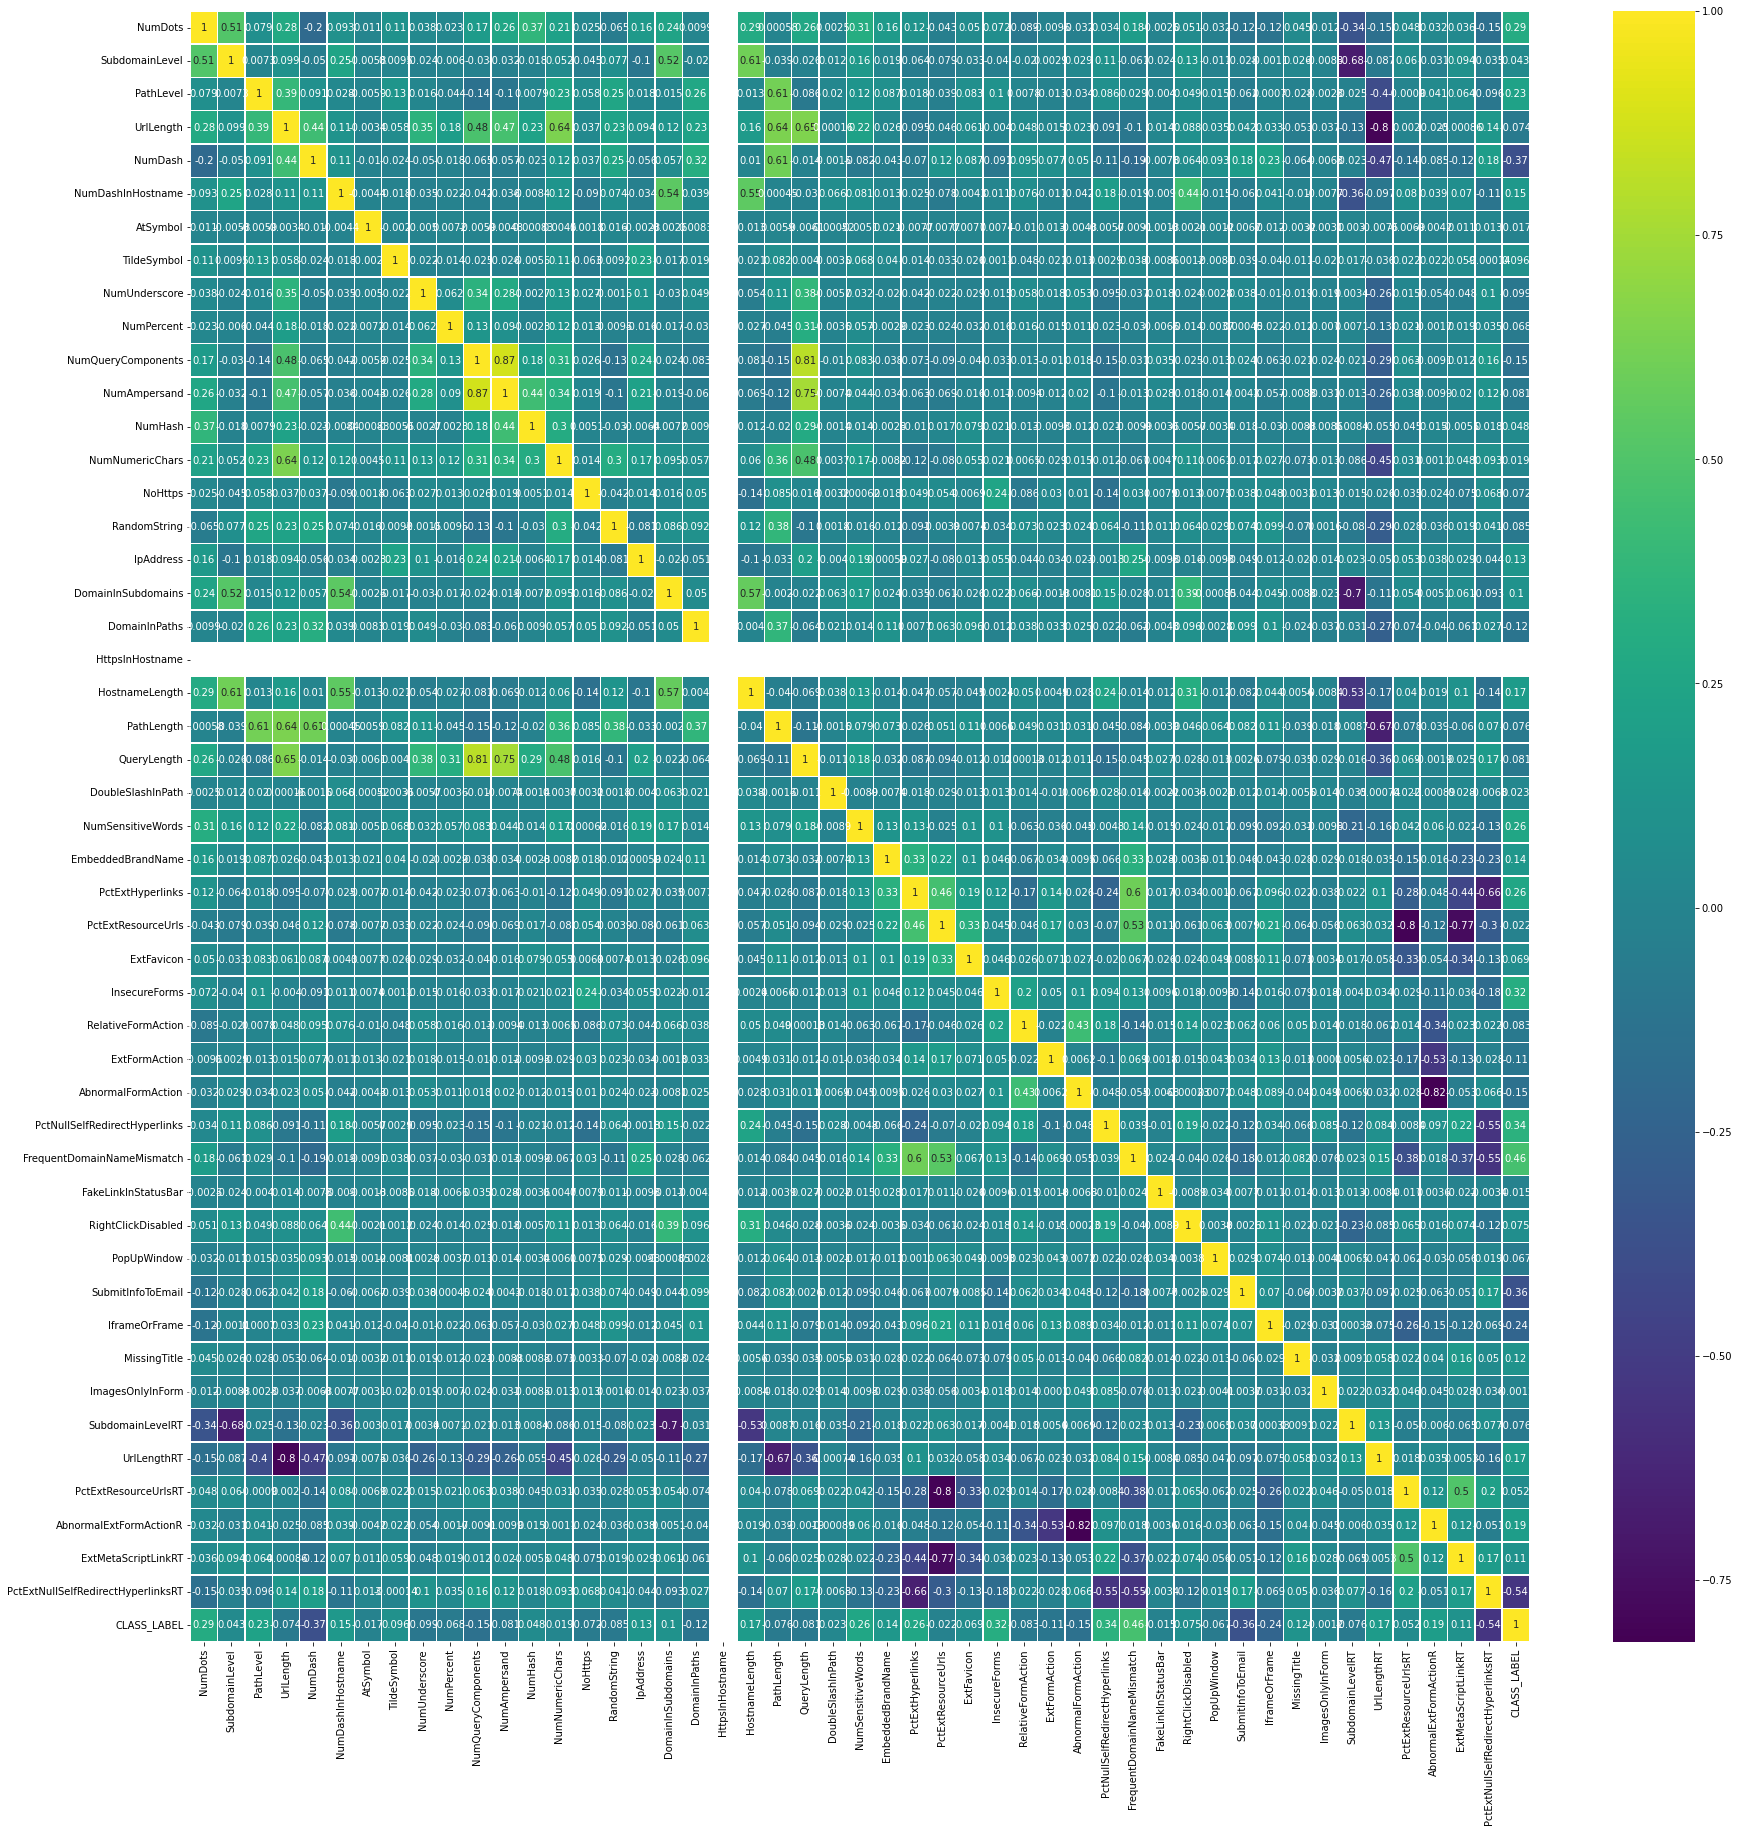

In [16]:
plt.figure(figsize=(30, 30))
sns.heatmap(fishing.corr(),annot=True,cmap='viridis',linewidths=.5)

In [17]:
fishing.columns

Index(['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperlinksRT

In [18]:
subset_fishing = fishing[['NumDots', 'PathLevel', 'NumDash', 'NumSensitiveWords', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'InsecureForms', 'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'SubmitInfoToEmail', 'IframeOrFrame', 'CLASS_LABEL']]

subset_fishing.head()    

,NumDots,PathLevel,NumDash,NumSensitiveWords,PctExtHyperlinks,PctExtResourceUrls,InsecureForms,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,SubmitInfoToEmail,IframeOrFrame,CLASS_LABEL
0,3,5,0,0,0.000,0.250000,1,0.0,0,0,0,1
1,3,3,0,1,0.000,0.000000,1,0.0,0,0,0,1
2,3,2,0,0,0.375,1.000000,1,0.0,0,0,0,1
3,3,6,1,0,1.000,0.095238,1,0.0,1,1,0,1
4,3,4,0,0,1.000,1.000000,0,0.0,1,0,1,1


In [19]:
subset_fishing.shape

(10000, 12)

In [20]:
y = subset_fishing['CLASS_LABEL']
X = subset_fishing.drop(['CLASS_LABEL'], axis = 1)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [22]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state = 42)

In [23]:
random_model = RandomForestClassifier(n_estimators=250, n_jobs = -1)

In [24]:
#Fit
random_model.fit(Xtrain, ytrain)

y_pred = random_model.predict(Xtest)

#Checking the accuracy
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

99.81 %


In [25]:
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

97.9 %
